---
title: "DFT and FFT"
execute:
  # echo: false
  freeze: auto  # re-render only when source changes
format:
  html:
    code-fold: true
    code-summary: "Show the code"
---

When studying the frequencies of a time series, we don't actually calculate the Fourier transform, but the Discrete Fourier Transform (DFT).

$$
\begin{split}
\text{continuous Fourier:}&\\
F(f) &= \int_{-\infty}^{\infty}x(t)e^{-2\pi i f t}dt\\
\text{discrete Fourier:}&\\
F_k &= \sum_{n=0}^{N-1} x_n e^{-2\pi i \frac{k}{N} n}
\end{split}
$$

Clearly, in the discrete version, time $t$ becomes $n$ and frequency $f$ becomes $\frac{k}{N}$. The Fourier transform yields a complex number for each value of the frequency $k$.

Let's see this in action. We will calculate the Fourier transform of the function:

$$
x(t) = 3 \sin(2\pi k_1 t) + \tfrac{1}{2} \cos(2\pi k_2 t) + 2
$$

In [1]:
#| code-summary: "import stuff"
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()  # datetime converter for a matplotlib
import seaborn as sns
sns.set(style="ticks", font_scale=1.5)
import matplotlib.gridspec as gridspec
import math
import scipy

# plt.rcParams.update({
#     "text.usetex": True,
#     "font.family": "serif",
#     "font.serif": "Computer Modern",
# })

# %matplotlib widget

[Text(0.5, 0, 'time (s)')]

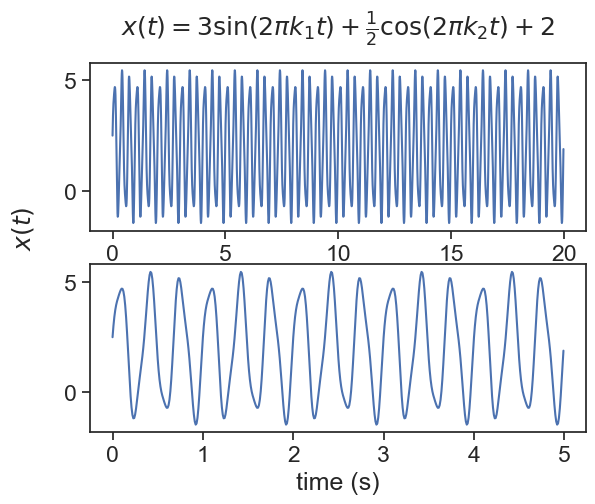

In [2]:
#| code-summary: "define functions for calculating DTW"
fig, ax = plt.subplots(2,1)
k1 = 3.0 # Hz = 1/s
k2 = 7.0 # Hz = 1/s
dt = 0.01
t = np.arange(0,20,dt)
N = len(t)
tau = math.tau
x = 3.0 * np.sin(tau * k1 * t) + 0.5*np.cos(tau * k2 * t) + 2.0
ax[0].plot(t, x)
ax[1].plot(t[:int(5/dt)], x[:int(5/dt)])
fig.text(0,0.5, r"$x(t)$", rotation="vertical")
ax[0].set_title(r"$x(t) = 3 \sin(2\pi k_1 t) + \frac{1}{2} \cos(2\pi k_2 t) + 2$", pad=20)
ax[1].set(xlabel=r"time (s)")

In [3]:
#| code-fold: false

fft = scipy.fft.fft(x) / N
k = scipy.fft.fftfreq(N, dt)
fft_abs = np.abs(fft)
# [:N//2]

[Text(0.5, 0, 'k (Hz)'),
 Text(0, 0.5, '$|F|$'),
 Text(0.5, 1.0, 'sqrt of power spectrum of $x(t)$')]

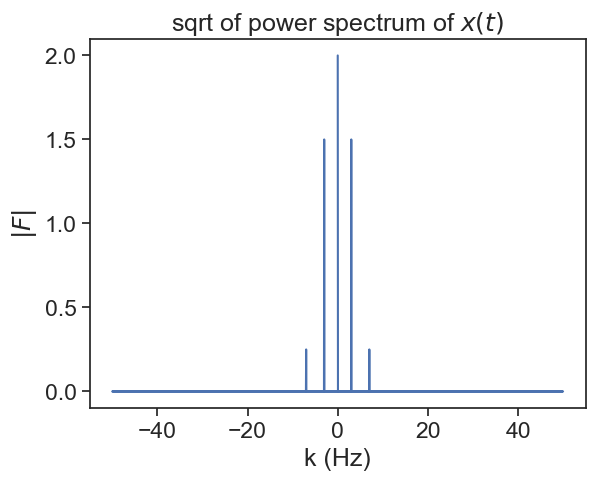

In [4]:
#| code-summary: "plot power spectrum"
fig, ax = plt.subplots()
ax.plot(k, fft_abs)
ax.set(xlabel="k (Hz)",
       ylabel=r"$|F|$",
       title=r"sqrt of power spectrum of $x(t)$")

[Text(0.5, 0, 'k (Hz)'),
 Text(0, 0.5, '$|F|$'),
 Text(0.5, 1.0, 'sqrt of power spectrum of $x(t)$')]

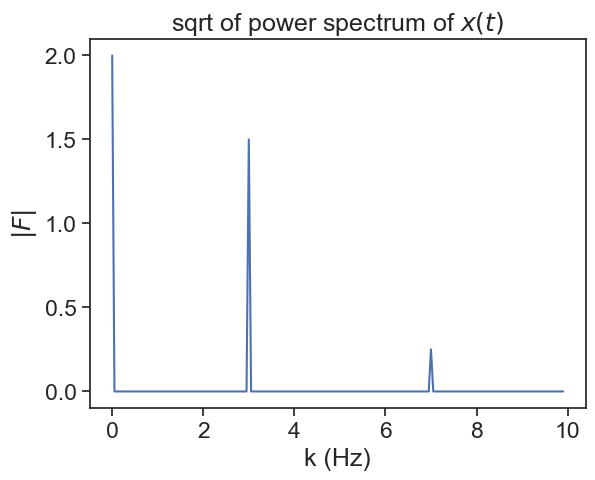

In [5]:
#| code-summary: "plot power spectrum"

dk = 1 / (t.max() - t.min())
n = int(10/dk)

fig, ax = plt.subplots()
ax.plot(k[:n], fft_abs[:n])
ax.set(xlabel="k (Hz)",
       ylabel=r"$|F|$",
       title=r"sqrt of power spectrum of $x(t)$")

In [6]:
def compute_acf(series):
    N = len(series)
    lags = np.arange(N)
    acf = np.zeros_like(lags)
    series = (series - series.mean()) / series.std()
    for i in lags:
        acf[i] = np.sum(series[i:] * series[:N-i])
    acf = acf / N
    return lags, acf

In [7]:
lags, acf = compute_acf(x)
lags = lags * dt

fft_acf = scipy.fft.fft(acf) / N
freq_fft_acf = scipy.fft.fftfreq(len(acf), dt)

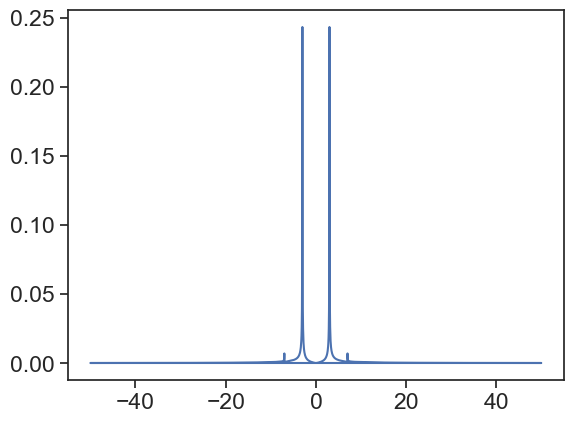

In [8]:
fig, ax = plt.subplots()
ax.plot(freq_fft_acf,np.abs(fft_acf))

[Text(0.5, 0, 'k (Hz)'),
 Text(0, 0.5, '$|F|$'),
 Text(0.5, 1.0, 'sqrt of power spectrum of $x(t)$')]

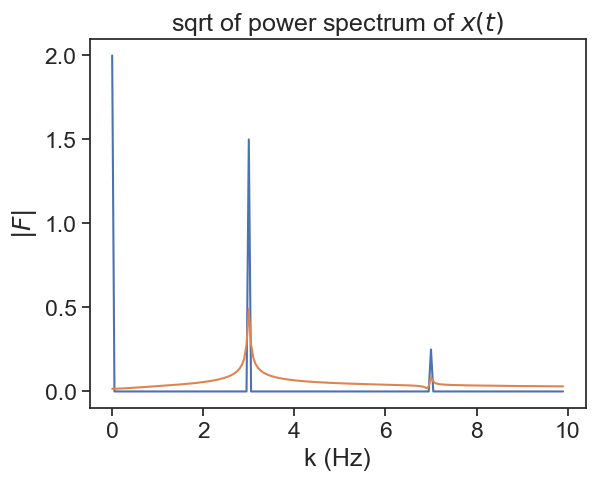

In [9]:
#| code-summary: "plot power spectrum"


fig, ax = plt.subplots()

dk = 1 / (t.max() - t.min())
n = int(10/dk)
ax.plot(k[:n], fft_abs[:n], label="power spect")

dk = 1 / (lags.max() - lags.min())
n = int(10/dk)
ax.plot(freq_fft_acf[:n], np.sqrt(np.abs(fft_acf))[:n], label="abs fft acf")


ax.set(xlabel="k (Hz)",
       ylabel=r"$|F|$",
       title=r"sqrt of power spectrum of $x(t)$")